In [3]:
import keras
keras.__version__

'2.3.1'

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels)

11493376/11490434 [==============================] - 5s 0us/step
(60000, 28, 28) [5 0 4 ... 5 6 8]


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
print(len(train_labels), train_images.shape[0])
a, b, c = train_images.shape
print(a, b, c)

60000 60000
60000 28 28


In [8]:
train_labels[4]

9

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

label은 : 5


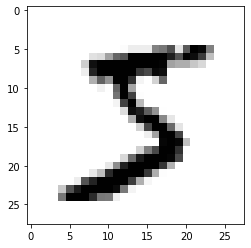

In [14]:
import matplotlib.pyplot as plt
digit = train_images[0]
print("label은 :", train_labels[0])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [15]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


- 학습할 데이터를 train, test로 나눠놨으면,
- keras models을 Sequential()로 network를 만든다.
- network모델에 이제는 레이어들을 그려놓겠다.
- network.add, layers.Dense(해당 layers에 노드수 정의, activation 정의, input_shape 정의)

In [16]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

- 이제 모델을 그려놨으니깐, compile해보자
- compile할 때, 사용할 optimizer, loss func, metrics 정의해본다.

In [17]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

- 이제는 input을 2d로 넣을 수 없으니까 1d로 바꿔 준다.
- reshape을 통해 28*28의 2d를 784의 1d로 변경해줌
- 255로 나눠주므로 정규화해줌. 0-255 > 0-1로 변경

In [19]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- 앞에서 input data의 shape을 정의해 줬으니, 
- 이제는 label을 to_categorical을 통해 One-Hot Encoding해줌

In [31]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
network.summary()

Epoch 1/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0287 - accuracy: 0.9912
Epoch 2/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0219 - accuracy: 0.9935
Epoch 3/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0168 - accuracy: 0.9952
Epoch 4/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0129 - accuracy: 0.9962
Epoch 5/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.0107 - accuracy: 0.9970
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
___________________________________________________

- dense_1 : output shaep이 (None, 512) None인 이유는 batch로 input이 얼마나 들어올지 알수 없어서.
- param는 512 * 784

In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 77us/step


In [23]:
print('test_acc:', test_acc)

test_acc: 0.9800000190734863


In [24]:
prediction = network.predict(test_images)

In [25]:
prediction[0]

array([8.7672110e-09, 7.1507761e-12, 3.0065266e-07, 3.1088708e-05,
       2.4647352e-13, 2.2369932e-08, 7.2824018e-16, 9.9996853e-01,
       2.3650216e-08, 4.5310284e-08], dtype=float32)

In [29]:
import numpy as np

np.argmax(prediction[6])

4

- argmax는 몇번째 index에 가장 큰값이 들어 있는거냐, : **index를 알려줌** 

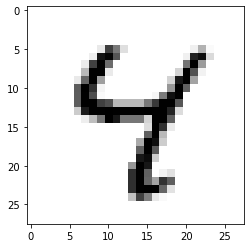

In [30]:
import matplotlib.pyplot as plt
digit = np.reshape(test_images[6], (28, 28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()